In [1]:
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
import re

data = pickle.load( open('tweetsMar11to20.pkl','rb'))

In [2]:
df = pd.DataFrame(data)

In [3]:
df.head()

,times,text,hashtags,favorites,retweets
0,Mon Mar 20 19:42:39 +0000 2017,Australia's Securities Regulator Seeks Closer ...,"[XBT, BTC, Bitcoin]",2,2
1,Mon Mar 20 19:40:00 +0000 2017,"Hyperledger member, @Monetago aims to help ban...",[],2,1
2,Mon Mar 20 19:36:09 +0000 2017,#Bitcoin Is Finally Starting to Settle Down ht...,"[Bitcoin, BTC, finance, fintech, cryptocurrenc...",1,2
3,Mon Mar 20 19:34:22 +0000 2017,#bitcoin steadies after biggest three-day tumb...,"[bitcoin, TopNews, India]",2,3
4,Mon Mar 20 19:30:33 +0000 2017,"Get Paid 2.2% Passive Bitcoin up to $10,000 da...",[],3,1


In [4]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [7]:
tokens = []

for i in range(len(df.text)):
    tweet = df.text.iloc[i]
    tweet = tweet.lower()
    token = preprocess(tweet)
    tokens.append(token)

In [8]:
##basic counter without cleaning text for stopwords, punctuation etc
from collections import Counter

count_all = Counter()
terms_all = []

for tweet in tokens:
    for word in tweet:
        terms_all.append(word)

count_all.update(terms_all)
print count_all.most_common(20)   

[(u'bitcoin', 3799), (u'#bitcoin', 3365), (u'.', 3131), (u'the', 2662), (u'to', 1752), (u',', 1679), (u':', 1545), (u'\u2026', 1435), (u'is', 1406), (u'of', 1391), (u'$', 1259), (u'a', 1235), (u'-', 1173), (u'in', 1071), (u'for', 1032), (u'and', 970), (u';', 924), (u'#blockchain', 875), (u'&', 830), (u'!', 783)]


In [9]:
from nltk.corpus import stopwords
import string

unicodeChars = [u"\u2026",u'\u2013',u'\u2019', u'\ud83d']
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'bitcoin', 'btc'] + unicodeChars

stops_removed = []
count_all = Counter()

for tweet in tokens:
    for word in tweet:
        if word not in stop and not word.startswith(('#', '@')):
            stops_removed.append(word)
        

In [10]:
##\u2026 = ...
##\u2019 = '
count_all = Counter()
count_all.update(stops_removed)
for item in count_all.most_common(20):
    print item[0]

price
gt
etf
usd
amp
exchanges
new
unlimited
blockchain
sec
wallet
fork
get
average
1
across
news
currency
ethereum
free


In [11]:
##bigrams approach
from nltk import bigrams

terms_bigram = bigrams(stops_removed)

In [12]:
bigrams = list(terms_bigram)

In [13]:
count_all = Counter()
count_all.update(bigrams)
for item in count_all.most_common(20):
    print item[0][0], item[0][1]

average price
price across
across exchanges
gt gt
hard fork
latest price
price index
hardware wallet
advertise gt
earn 10
sec rejects
10 signing
signing gt
https://t.co/fqdlauf3yn lt
gt https://t.co/fqdlauf3yn
etf rejection
usd https://t.co/lzuu2wypqn
digital currency
get trezor
trezor 99


In [14]:
#hashtags only
hashtags = []

for tweet in tokens:
    for word in tweet:
        if word not in stop and word.startswith(('#')):
            hashtags.append(word)

count_all = Counter()
count_all.update(hashtags)
for item in count_all.most_common(30):
    print item[0]

#bitcoin
#blockchain
#fintech
#btc
#crypto
#news
#cryptocurrency
#ethereum
#shopping
#altcoin
#bitcoinrush
#iot
#ai
#trading
#rt
#qtum
#bigdata
#etf
#medium
#cybersecurity
#dash
#segwit
#tech
#casino
#startup
#vr
#sec
#finance
#infosec
#bitcoinunlimited


In [2]:
import pandas as pd
priceDf = pd.read_csv('btcpricedata.csv')
priceDf.drop([425, 426],inplace=True)

dates_bitcoin = []

for i in range(len(df)):
    if 'etf' in tokens[i]:
        dates_bitcoin.append(df.times.iloc[i])
        
ones = [1]*len(dates_bitcoin)
idx = pd.DatetimeIndex(dates_bitcoin)
bitcoinHashes = pd.Series(ones, index=idx)

per_hr = bitcoinHashes.resample('240min', how='sum').fillna(0)

NameError: name 'df' is not defined

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [197]:
def topicOverTime(x):
    topics = x.split()
    dates_bitcoin = []
    aggPol = []
    aggSub = []

    for i in range(len(df)):
        val = 0
        for topic in topics:
            if topic in tokens[i]:
                val = 1
            else:
                pass
            
        if val == 1:
            dates_bitcoin.append(df.times.iloc[i])
            aggPol.append(df.polarity.iloc[i])
            aggSub.append(df.subjectivity.iloc[i])
    
    
                        
    ones = [1]*len(dates_bitcoin)
    idx = pd.DatetimeIndex(dates_bitcoin)
    bitcoinHashes = pd.Series(ones, index=idx)
    pols = pd.Series(aggPol, index=idx)
    subs = pd.Series(aggSub, index=idx)

    pricedates = list(priceDf.Date)
    prices = list(priceDf['Close Price'])
    priceDf['Date'] =  pd.to_datetime(priceDf['Date'], format='%Y-%m-%d %H:%M:%S')
    idx2 = pd.DatetimeIndex(priceDf['Date'])

    pricedata = pd.Series(prices, index=idx2)
    price_per_4hr = pricedata.resample('240min', how='mean')
    topicvol_per_4hr = bitcoinHashes.resample('240min', how='sum').fillna(0)
    pol_per_4hr = pols.resample('240min',how='mean').fillna(0)
    sub_per_4hr = pols.resample('240min',how='mean').fillna(0)
    
    f, axarr = plt.subplots(3, sharex=True, figsize=(20,10))
    axarr[0].plot(topicvol_per_4hr)
    axarr[0].set_title('mentions of ' +  x + ' per 4 hours')
    axarr[1].plot(price_per_4hr,color='r')
    axarr[1].set_title('BTC price($) per 4 hours')
    axarr[2].plot(pol_per_4hr, color='b')
    axarr[2].set_title('Sentiment of Tweets')


/Users/connor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/connor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:35: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
/Users/connor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/connor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


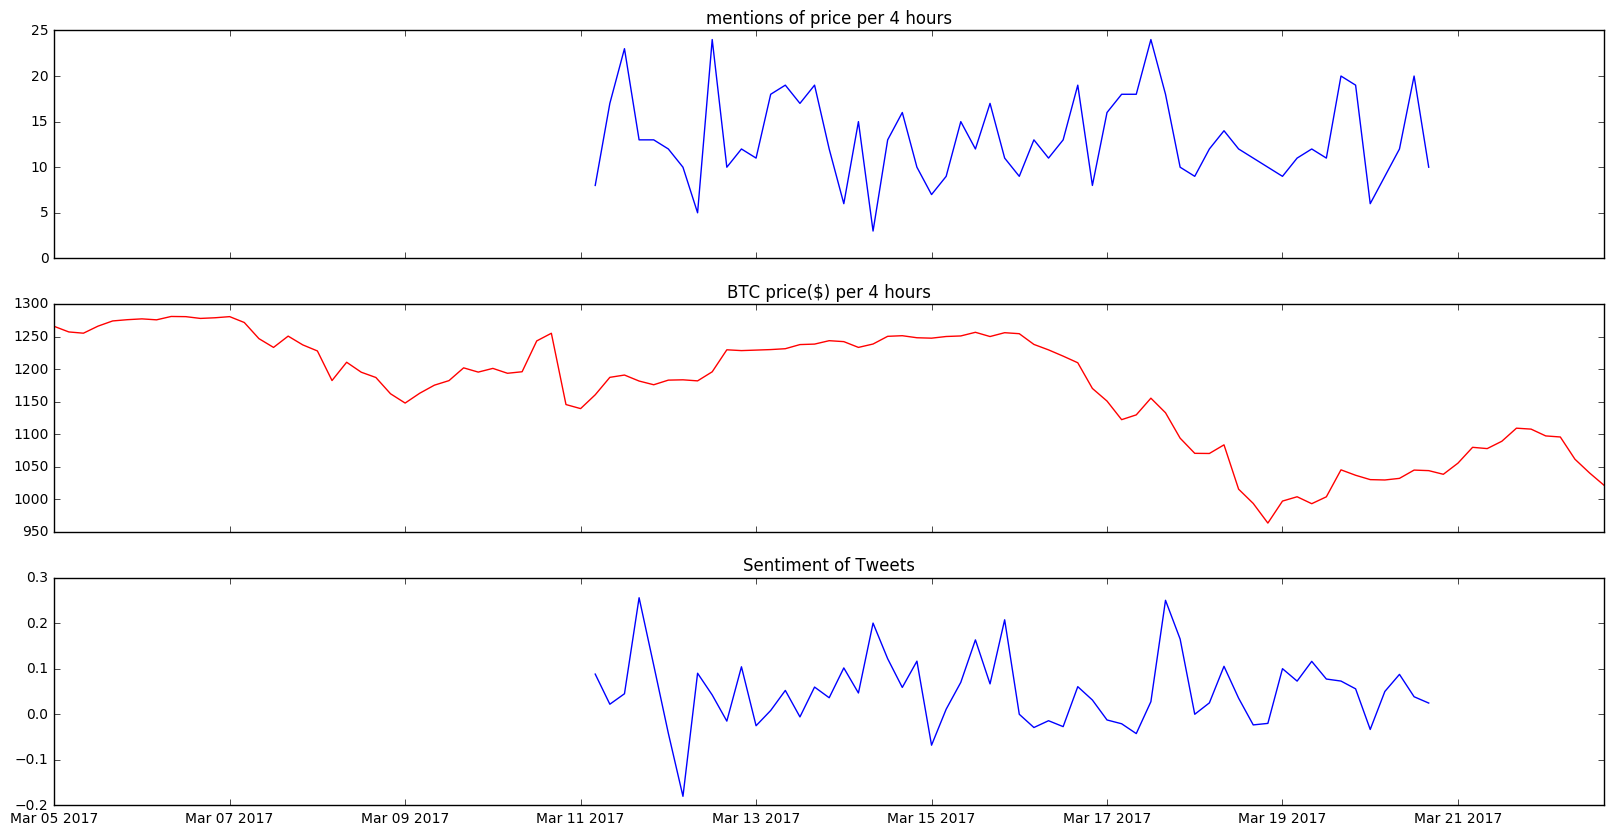

In [200]:
topicOverTime('price')

In [156]:
%%bash
pip install textblob

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [157]:
from textblob import TextBlob

In [180]:
TextBlob(df.text.iloc[9]).sentiment.subjectivity

0.19444444444444448

In [185]:
df['polarity'] = df.text.apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df.text.apply(lambda x: TextBlob(x).sentiment.subjectivity)